In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data = pd.read_excel("input/insurance.xlsx")
data.head()
#data.info()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [31]:
'''
We see that we have 3 objective data in our data frame. (sex, smoker, region)
'''
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        print(f"======== {name} ===========")
        print(data[name].value_counts())

======== sex ===========
male      676
female    662
Name: sex, dtype: int64
======== smoker ===========
no     1064
yes     274
Name: smoker, dtype: int64
======== region ===========
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [32]:
from sklearn.preprocessing import LabelEncoder
for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [33]:
'''
 there are four different types of regions,
'''

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()

values = dict(data["region"].value_counts())

for e , (val , _) in enumerate(values.items()):
    data["region_" + str(val)] = part[:,e]

data = data.drop(["region"] , axis = 1)
#data.head()

Skewness in Column : Sqrt Expenses  -0.008734062011873602


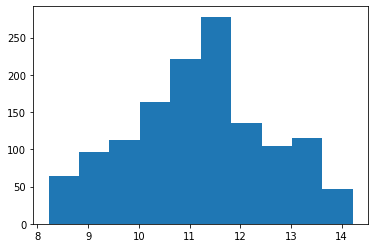

In [34]:
from scipy import stats 
col_cox , lam = stats.boxcox(data["expenses"])[0:2]
print("Skewness in Column : Sqrt Expenses " ,pd.Series(col_cox).skew())
plt.hist(col_cox)
plt.show()

In [35]:
data["expenses"] = col_cox

In [36]:
remaining_columns = list(data.columns)
remaining_columns.remove("expenses")

In [37]:
X = data[remaining_columns].values 
Y = data['expenses'].values

In [38]:
'''
20% of random data points as a distinct set 
80% as training
'''

from sklearn.model_selection import train_test_split
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

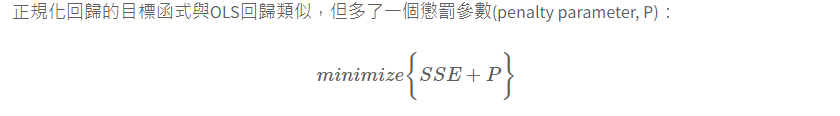

In [22]:
'''
Regularized Regression 正規化回歸
對回歸係數大小做出約束，並逐漸的將回歸係數壓縮到零。而對回歸係數的限制將有助於降低係數的幅度和波動，並降低模型的變異。
'''

from sklearn.linear_model import Ridge , Lasso , ElasticNet , LinearRegression
model = LinearRegression()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))    #0.74970

 Training Accuracy :  0.7749547304018276
 Testing Accuracy :  0.7497079440424593


## 懲罰參數(penalty parameter, P)
常見的懲罰係數有兩種(分別對應到 ridge 回歸 & lasso 回歸)，效果是類似的。懲罰係數將會限制回歸係數的大小，除非該變數可以使誤差平方和(SSE)降低對應水準，該特徵係數才會上升。以下就來進一步介紹兩種最常見的正規化回歸法。

In [23]:
'''
如果我們的數據集少或特徵和特徵之間的相關性很小，那麼我們應該選擇 Ridge ，數據少情況下使用 Lassalle，
那麼少數特徵的權重將變為 0，即會導致數據丟失，最終削弱我們的模型。Ridge 模型只會將係數逼近到接近零（但不會真的是0）
'''

model = Ridge()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))  
# Scoure 0.7502 better than Regression

 Training Accuracy :  0.7749377189073672
 Testing Accuracy :  0.7502904376174965


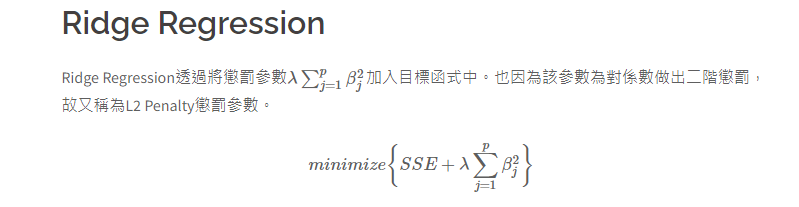

In [24]:
'''
Lasso模型真的會將係數推進成0
'''
model = Lasso()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.2589359547500544
 Testing Accuracy :  0.2841101128580015


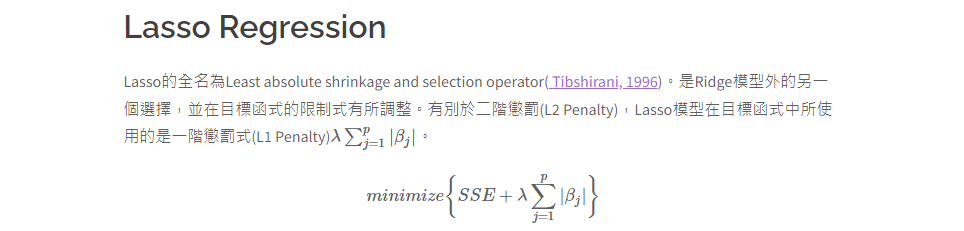

In [25]:
'''
雖然Lasso模型會執行變數挑選，但一個源自於懲罰參數的結果就是，通常當兩個高度相關的變數的係數在被逼近成為0的過程中，
可能一個會完全變成0但另為一個仍保留在模型中。此外，這種一個在內、一個在外的處理方法不是很有系統。
相對的，Ridge模型的懲罰參數就稍具效率一點，可以有系統的將高相關性變數的係數一起降低。
於是Elastic Net模型的優勢就在於，它綜合了 Ridge Penalty 達到有效正規化優勢以及 Lasso Penalty 能夠進行變數挑選優勢。
'''

# Elastic 

# lambda_1*L1 + lambda_2*L2 
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model = ElasticNet()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.26553917703322805
 Testing Accuracy :  0.2906976260872923


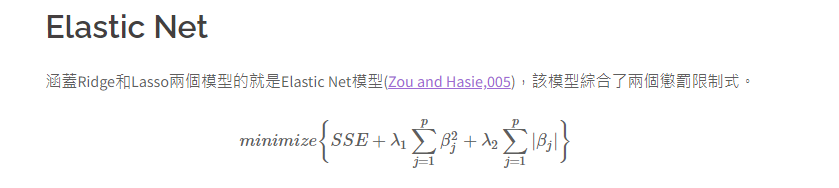

## Changing Parameter for Lasso and ElasticNet

In [39]:
model = Lasso(alpha = 0.01)
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.7733046323058576
 Testing Accuracy :  0.7516010885977982


In [40]:
# Elastic 

# lambda_1*L1 + lambda_2*L2 
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model = ElasticNet(alpha = 0.01 + 0.01 , l1_ratio = 0.01/(0.01 + 0.01))
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.7698503985770702
 Testing Accuracy :  0.7531054985757829
